<a href="https://colab.research.google.com/github/hridoy100/Blood-Cell-Detection/blob/main/Object_Detection_(Blood_Cell_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# So first we need to download our dataset...
# It can be found in from this url..
!git clone 'https://github.com/hridoy100/BCC_ML_Project'

Cloning into 'BCC_ML_Project'...
remote: Enumerating objects: 746, done.
remote: Counting objects: 100% (746/746), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 746 (delta 359), reused 746 (delta 359), pack-reused 0
Receiving objects: 100% (746/746), 7.31 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (359/359), done.


Import necessary libraries

In [ ]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

## -----------------------------------**Data Preprocessing Starts**-----------------------------------

In [ ]:
# All training data are kept inside as Annotations. 
# Each xml file contains the position of each blood cell of an image
annotations = sorted(glob('/content/BCC_ML_Project/BCCD/Annotations/*.xml'))

df = []
cnt = 0
for file in annotations:
  # Extracted file name from Annotations folder.. e.g. "BloodImage_00000.xml" but we exclude the .xml part.
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  # here str(cnt).jpg means 0.jpg. Look below, you will see cnt to be incrementing sequentially..
  filename = str(cnt) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('/content/blood_cell_detection.csv', index=False)

In [ ]:
img_width = 640
img_height = 480

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv('/content/blood_cell_detection.csv')

le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
# we fit the dataset according to 3 classes of bloods: "WBC", "RBC" and "Platelets"
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['Platelets' 'RBC' 'WBC']


,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,BloodImage_00000.jpg,0.jpg,WBC,260,491,177,376,2,231,199,375,276,0.585938,0.360938,0.575000,0.414583
1,BloodImage_00000.jpg,0.jpg,RBC,78,184,336,435,1,106,99,131,385,0.204687,0.165625,0.802083,0.206250
2,BloodImage_00000.jpg,0.jpg,RBC,63,169,237,336,1,106,99,116,286,0.181250,0.165625,0.595833,0.206250
3,BloodImage_00000.jpg,0.jpg,RBC,214,320,362,461,1,106,99,267,411,0.417187,0.165625,0.856250,0.206250
4,BloodImage_00000.jpg,0.jpg,RBC,414,506,352,445,1,92,93,460,398,0.718750,0.143750,0.829167,0.193750
5,BloodImage_00000.jpg,0.jpg,RBC,555,640,356,455,1,85,99,597,405,0.932813,0.132812,0.843750,0.206250
6,BloodImage_00000.jpg,0.jpg,RBC,469,567,412,480,1,98,68,518,446,0.809375,0.153125,0.929167,0.141667
7,BloodImage_00000.jpg,0.jpg,RBC,1,87,333,437,1,86,104,44,385,0.068750,0.134375,0.802083,0.216667
8,BloodImage_00000.jpg,0.jpg,RBC,4,95,406,480,1,91,74,49,443,0.076563,0.142187,0.922917,0.154167
9,BloodImage_00000.jpg,0.jpg,RBC,155,247,74,174,1,92,100,201,124,0.314063,0.143750,0.258333,0.208333


Split into training and validation set

In [ ]:
df_train, df_valid = model_selection.train_test_split(df, test_size=0.1, random_state=13, shuffle=True)
print(df_train.shape, df_valid.shape)

(4399, 16) (489, 16)


In [ ]:
os.mkdir('/content/bcc/')
os.mkdir('/content/bcc/images/')
os.mkdir('/content/bcc/images/train/')
os.mkdir('/content/bcc/images/valid/')

os.mkdir('/content/bcc/labels/')
os.mkdir('/content/bcc/labels/train/')
os.mkdir('/content/bcc/labels/valid/')

# We have only created the following directories but haven't added anything yet.

Let's move images into corresponding folders

In [ ]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

In [ ]:
# Source folder paths..
src_img_path = "/content/BCC_ML_Project/BCCD/JPEGImages/"
src_label_path = "/content/BCC_ML_Project/BCCD/Annotations/"

# destination paths..
train_img_path = "/content/bcc/images/train"
train_label_path = "/content/bcc/labels/train"

valid_img_path = "/content/bcc/images/valid"
valid_label_path = "/content/bcc/labels/valid"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

In [ ]:
# Delete unnecessary checkpoints...
try:
  shutil.rmtree('/content/bcc/images/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/images/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

print("No. of Training images", len(os.listdir('/content/bcc/images/train')))
print("No. of Training labels", len(os.listdir('/content/bcc/labels/train')))

print("No. of valid images", len(os.listdir('/content/bcc/images/valid')))
print("No. of valid labels", len(os.listdir('/content/bcc/labels/valid')))

No. of Training images 364
No. of Training labels 364
No. of valid images 270
No. of valid labels 270


## -----------------------------------**Data Preprocessing Complete**-----------------------------------

We will use YOLO v5 model. So, we need to clone yolo v5 from its git directory...

In [ ]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 5792, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 5792 (delta 6), reused 12 (delta 2), pack-reused 5770
Receiving objects: 100% (5792/5792), 8.28 MiB | 25.15 MiB/s, done.
Resolving deltas: 100% (3950/3950), done.


In [ ]:
!pip install -qr '/content/yolov5/requirements.txt'  # install dependencies

     |████████████████████████████████| 645kB 16.2MB/s 


We need to create A Yaml file and replace it into yolov5 directory.
The Yaml file will contain the names of classes we want to predict or identify

In [ ]:
!echo -e 'train: /content/bcc/images/train\nval: /content/bcc/images/valid\n\nnc: 3\nnames: ['Platelets', 'RBC', 'WBC']' >> bcc.yaml
!cat 'bcc.yaml'

train: /content/bcc/images/train
val: /content/bcc/images/valid

nc: 3
names: [Platelets, RBC, WBC]


In [ ]:
# Copy our local bcc.yaml file into yolov5 folder
shutil.copyfile('/content/bcc.yaml', '/content/yolov5/bcc.yaml')

'/content/yolov5/bcc.yaml'

In [ ]:
# Inside yolov6.yaml nc denotes the number of classes. As we are predicting 3 classes or 3 blood cells we will put 3 into it.
# That's why we ran this code.. Initially nc: 80 by default. We programmatically changed it to 3.

!sed -i 's/nc: 80/nc: 3/g' ./yolov5/models/yolov5s.yaml

Now we need to train our model...
# **Training----------------->**

In [ ]:
# train.py            --img width --batch size  --epochs count  --data "yaml file" --cfg "model's yaml file" --name "output directory"
!python yolov5/train.py --img 640 --batch 4     --epochs 50     --data bcc.yaml    --cfg models/yolov5s.yaml --name  BCCM

github: skipping check (not a git repository)
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-16-gc5c647e torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='./yolov5/models/yolov5s.yaml', data='bcc.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='./yolov5/data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='BCCM', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/BCCM', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-20 18:58:04.760881: 

# BATCH PREDICTION---------------->
we can take a batch of images and predict which blood cells are in those images. We will label these images according to their classes. Actually our model will identify the labels.

In [ ]:
!python yolov5/detect.py --source /content/bcc/images/valid/ --weights '/content/runs/train/BCCM/weights/best.pt' --name '/content/inference/output'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='/content/inference/output', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/bcc/images/valid/', update=False, view_img=False, weights=['/content/runs/train/BCCM/weights/best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-16-gc5c647e torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/270 /content/bcc/images/valid/BloodImage_00000.jpg: 480x640 22 RBCs, 1 WBC, Done. (0.011s)
image 2/270 /content/bcc/images/valid/BloodImage_00001.jpg: 480x640 26 RBCs, 1 WBC, Done. (0.010s)
image 3/270 /content/bcc/images/valid/BloodImage_00002.jpg: 480x640 27 RBCs, 1 WBC, Done. (0.010s)
image 4/270 /content/bcc/images/valid/BloodImage_00003.jpg: 480x640 1 Platelets, 20 RBCs, 1 WBC, Done.

In [ ]:
disp_images = glob('/content/inference/output/*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Single image prediction

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='/content/inference/output/single/', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/bcc/images/valid/BloodImage_00003.jpg', update=False, view_img=False, weights=['/content/runs/train/BCCM/weights/best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-16-gc5c647e torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/bcc/images/valid/BloodImage_00003.jpg: 480x640 1 Platelets, 20 RBCs, 1 WBC, Done. (0.011s)
Results saved to /content/inference/output/single
Done. (0.028s)


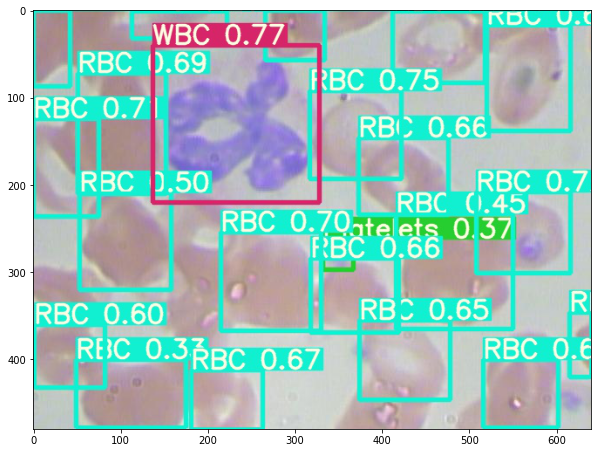

In [ ]:
try:
  shutil.rmtree('/content/inference/output/single/')
except FileNotFoundError:
  pass

!python yolov5/detect.py --source /content/bcc/images/valid/BloodImage_00003.jpg --weights '/content/runs/train/BCCM/weights/best.pt' --name '/content/inference/output/single/'

disp_images = glob('/content/inference/output/single/*')
fig=plt.figure(figsize=(10, 18))
columns = 1
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored